# Credit Approval Project
### By, Isabel Ernzen, Claire Linn, Cameron Porath

In [169]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [171]:
# Load the dataset from an Excel file
df= pd.read_excel("Credit_Approval.xlsx")
# Display the first 5 rows of the dataset to understand its structure and contents
df.head()

,Loan Amount,Loan Duration,Interest Rate,Credit Score,Loan Type,Repayment Status,Monthly Payment Amount,Age,Income,Average_balance,Employment_type,Seniority,Approval_Rate,Credit_approval
0,14797.948146,291.0,5.0,512.251074,Mortgage,Ongoing,574.428168,38.0,44108.0,3115.747392,Contract,5.0,0,0
1,12962.627609,94.0,3.0,795.102806,Auto,Ongoing,627.626284,31.0,8401.0,2006.180587,Permanent,2.0,0,0
2,72668.466035,272.0,7.0,718.526915,Personal,Paid Off,781.125473,28.0,7460.0,225.959050,Contract,12.0,0,0
3,27653.452184,17.0,4.0,565.717364,Auto,Paid Off,448.815675,47.0,21040.0,2110.999812,Self-employed,16.0,0,0
4,81380.064046,74.0,3.0,723.318143,Auto,Ongoing,332.796039,31.0,65475.0,1498.552585,Permanent,9.0,0,0


In [173]:
# Display general information about the dataset shape (rows, columns)
df.shape   # Output: (200, 14) → 200 rows and 14 columns

(200, 14)

In [175]:
# Display the names of all columns in the dataset
df.columns

Index(['Loan Amount', 'Loan Duration', 'Interest Rate', 'Credit Score',
       'Loan Type', 'Repayment Status', 'Monthly Payment Amount', 'Age',
       'Income', 'Average_balance', 'Employment_type', 'Seniority',
       'Approval_Rate', 'Credit_approval'],
      dtype='object')

In [177]:
#df informations
df.info()
# - Non-null count: how many values in that column are not missing
# - 'Approval_Rate' and 'Credit_approval' are int64 and have no missing values
# - This summary helps identify data quality issues and data types for preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan Amount             199 non-null    float64
 1   Loan Duration           198 non-null    float64
 2   Interest Rate           199 non-null    float64
 3   Credit Score            199 non-null    float64
 4   Loan Type               198 non-null    object 
 5   Repayment Status        199 non-null    object 
 6   Monthly Payment Amount  199 non-null    float64
 7   Age                     199 non-null    float64
 8   Income                  199 non-null    float64
 9   Average_balance         199 non-null    float64
 10  Employment_type         199 non-null    object 
 11  Seniority               199 non-null    float64
 12  Approval_Rate           200 non-null    int64  
 13  Credit_approval         200 non-null    int64  
dtypes: float64(9), int64(2), object(3)
memory 

In [179]:
df.describe()

,Loan Amount,Loan Duration,Interest Rate,Credit Score,Monthly Payment Amount,Age,Income,Average_balance,Seniority,Approval_Rate,Credit_approval
count,199.000000,198.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,200.00000,200.000000
mean,60366.609984,154.984848,4.407035,667.061164,843.664968,44.286432,27358.964824,3542.102538,12.090452,38.35000,0.500000
std,37888.116780,88.990131,1.954056,105.426318,486.864504,14.065265,22183.542895,2012.603398,7.341721,28.15566,0.501255
min,1115.540113,12.000000,1.000000,502.147274,101.706414,18.000000,1865.000000,37.446901,1.000000,0.00000,0.000000
25%,28469.395669,82.250000,3.000000,582.798379,459.799617,32.500000,11350.500000,1990.406345,6.000000,10.00000,0.000000
50%,57121.079218,142.000000,4.000000,655.971942,768.251829,43.000000,18371.000000,3501.428075,11.000000,40.00000,0.500000
75%,81591.249805,217.250000,6.000000,748.446948,1100.404336,53.500000,41975.000000,4729.735419,17.000000,60.00000,1.000000
max,149985.096476,351.000000,8.000000,898.254031,1981.296827,74.000000,79059.000000,7932.701232,29.000000,80.00000,1.000000


# Step 3 Cleaning the data

In [181]:
#list of missing values by column
df.isna().sum()

Loan Amount               1
Loan Duration             2
Interest Rate             1
Credit Score              1
Loan Type                 2
Repayment Status          1
Monthly Payment Amount    1
Age                       1
Income                    1
Average_balance           1
Employment_type           1
Seniority                 1
Approval_Rate             0
Credit_approval           0
dtype: int64

In [183]:
# Clean data by dropping rows that contain any missing values
df=df.dropna()
df.shape
# This removes all rows with at least one missing value.
# The dataset is reduced from 200 to 188 rows as a result.

(188, 14)

In [185]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

In [187]:
# Check for missing values again after cleaning - test the cleaning process
df.isna().sum()

Loan Amount               0
Loan Duration             0
Interest Rate             0
Credit Score              0
Loan Type                 0
Repayment Status          0
Monthly Payment Amount    0
Age                       0
Income                    0
Average_balance           0
Employment_type           0
Seniority                 0
Approval_Rate             0
Credit_approval           0
dtype: int64

# Step 4 – Exploratory Data Analysis (EDA) 

In [189]:
# Descriptive statistics
df.describe()

,Loan Amount,Loan Duration,Interest Rate,Credit Score,Monthly Payment Amount,Age,Income,Average_balance,Seniority,Approval_Rate,Credit_approval
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,60834.051903,155.835106,4.367021,668.026224,858.571926,44.505319,26383.760638,3640.685894,12.053191,40.797872,0.531915
std,38546.647194,89.662883,1.934317,106.311446,492.472172,14.095358,21730.441954,1998.290784,7.445153,27.261883,0.500313
min,1115.540113,12.000000,1.000000,502.147274,101.706414,18.000000,1865.000000,37.446901,1.000000,0.000000,0.000000
25%,28625.230310,82.750000,3.000000,583.558786,468.020861,33.000000,11161.000000,2138.657308,6.000000,10.000000,0.000000
50%,56903.238540,142.000000,4.000000,655.704365,781.345901,43.000000,17529.000000,3573.122074,11.000000,60.000000,1.000000
75%,84188.843630,219.000000,6.000000,759.487735,1112.030292,53.250000,39244.750000,4824.957488,17.000000,60.000000,1.000000
max,149985.096476,351.000000,8.000000,898.254031,1981.296827,74.000000,79059.000000,7932.701232,29.000000,80.000000,1.000000


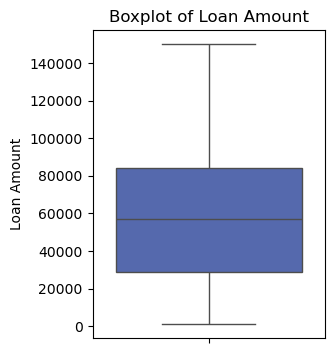

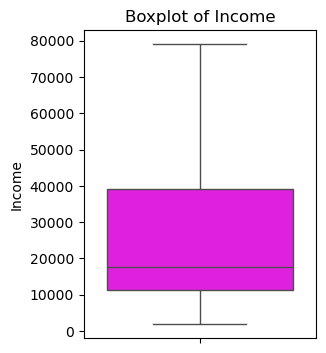

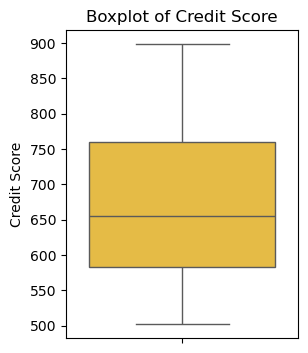

In [191]:
# Define custom colors for each feature to make the boxplots visually distinct
hex_color_blue = "#4661bc"      # Blue for Loan Amount
hex_color_magenta = "#ff00ff"   # Magenta for Income
hex_color_yellow = "#ffc72c"    # Yellow for Credit Score

# List of tuples containing the column name and its corresponding color
plot_info = [
    ('Loan Amount', hex_color_blue),
    ('Income', hex_color_magenta),
    ('Credit Score', hex_color_yellow)
]
# Generate the boxplots
for col, color in plot_info:
    plt.figure(figsize=(3, 4))  # Set figure size
    sns.boxplot(data=df[col], color=color)  # Create the boxplot with chosen color
    plt.title(f'Boxplot of {col}')  # Title for the plot
    plt.show()  # Display the plot

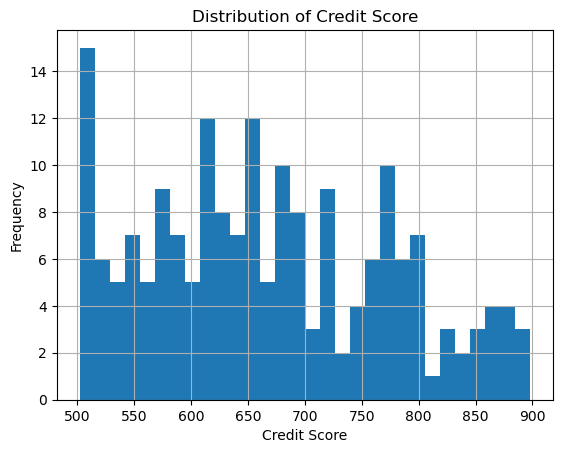

In [193]:
# Histogram to show the distribution of Credit Scores
df['Credit Score'].hist(bins=30)  # Creates a histogram with 30 bins
plt.title('Distribution of Credit Score')  # Adds a title
plt.xlabel('Credit Score')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Displays the plot
# This helps identify how credit scores are distributed in the dataset.

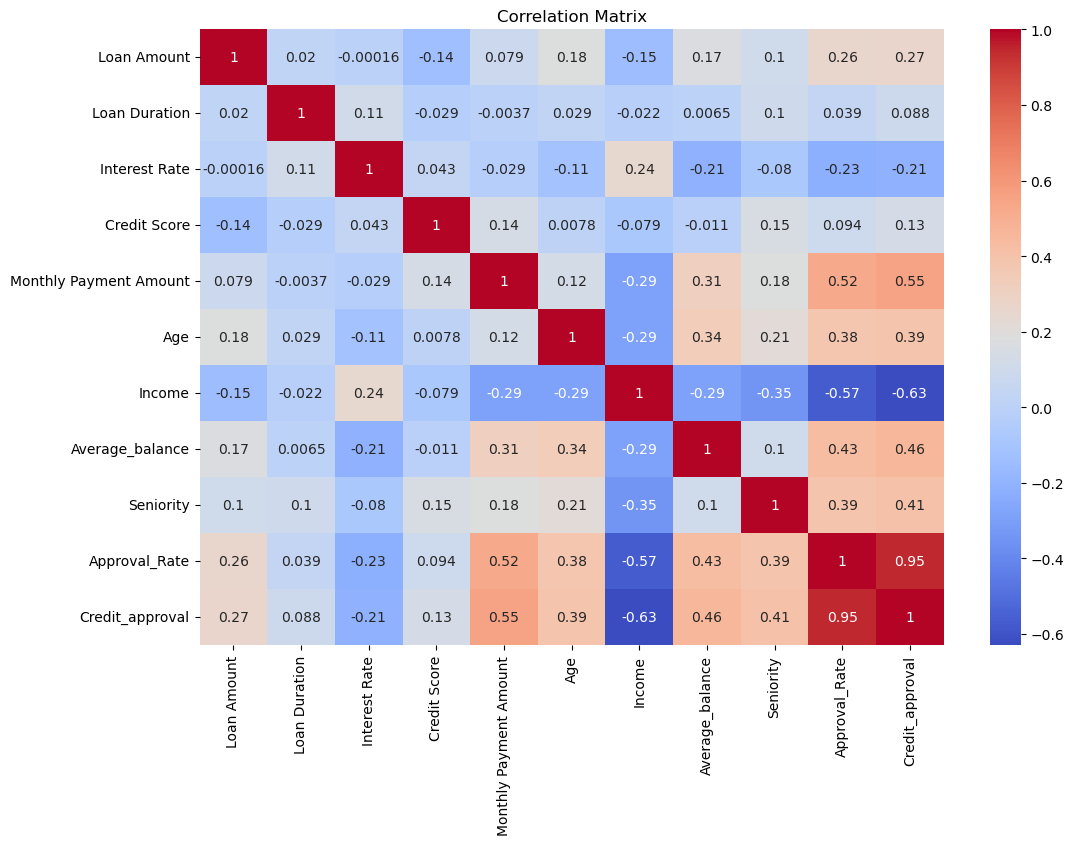

In [195]:
# Correlation heatmap for numeric columns only
plt.figure(figsize=(12, 8))  # Sets the figure size

# Select only numeric columns (float and int types)
numeric_df = df.select_dtypes(include=['float64', 'int64'])  

# Generate a correlation matrix heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')  # Adds a title to the heatmap
plt.show()  # Displays the heatmap

# This visualization helps identify how strongly features are related to each other.

#  Step 5 – Machine Learning Modeling

In [197]:
# View the first 5 rows of the dataset to verify the data structure
df.head()

,Loan Amount,Loan Duration,Interest Rate,Credit Score,Loan Type,Repayment Status,Monthly Payment Amount,Age,Income,Average_balance,Employment_type,Seniority,Approval_Rate,Credit_approval
0,14797.948146,291.0,5.0,512.251074,Mortgage,Ongoing,574.428168,38.0,44108.0,3115.747392,Contract,5.0,0,0
1,12962.627609,94.0,3.0,795.102806,Auto,Ongoing,627.626284,31.0,8401.0,2006.180587,Permanent,2.0,0,0
2,72668.466035,272.0,7.0,718.526915,Personal,Paid Off,781.125473,28.0,7460.0,225.959050,Contract,12.0,0,0
3,27653.452184,17.0,4.0,565.717364,Auto,Paid Off,448.815675,47.0,21040.0,2110.999812,Self-employed,16.0,0,0
4,81380.064046,74.0,3.0,723.318143,Auto,Ongoing,332.796039,31.0,65475.0,1498.552585,Permanent,9.0,0,0


In [199]:
# Show all column names in the dataset
df.columns

Index(['Loan Amount', 'Loan Duration', 'Interest Rate', 'Credit Score',
       'Loan Type', 'Repayment Status', 'Monthly Payment Amount', 'Age',
       'Income', 'Average_balance', 'Employment_type', 'Seniority',
       'Approval_Rate', 'Credit_approval'],
      dtype='object')

In [201]:
# Check the unique values in the target column 'Credit_approval'
df.Credit_approval.unique()
# Output: array([0, 1])
# This confirms it's a binary classification problem:
# 0 = Not approved, 1 = Approved

array([0, 1], dtype=int64)

In [241]:
# Separate features (X) and target variable (y)

# Drop 'Credit_approval' because it's the target we're trying to predict,
# and drop 'Approval_Rate' since it's strongly correlated with the target and adds redundancy.
# Also drop 'Loan Type', 'Repayment Status', and 'Employment_type' since they are categorical
X = df.drop(['Credit_approval', 'Approval_Rate','Loan Type','Repayment Status', 'Employment_type' ],axis=1)

# Set target variable y
y = df['Credit_approval']

In [225]:
# Preview the features
X

,Loan Amount,Loan Duration,Interest Rate,Credit Score,Monthly Payment Amount,Age,Income,Average_balance,Seniority
0,14797.948146,291.0,5.0,512.251074,574.428168,38.0,44108.0,3115.747392,5.0
1,12962.627609,94.0,3.0,795.102806,627.626284,31.0,8401.0,2006.180587,2.0
2,72668.466035,272.0,7.0,718.526915,781.125473,28.0,7460.0,225.959050,12.0
3,27653.452184,17.0,4.0,565.717364,448.815675,47.0,21040.0,2110.999812,16.0
4,81380.064046,74.0,3.0,723.318143,332.796039,31.0,65475.0,1498.552585,9.0
...,...,...,...,...,...,...,...,...,...
195,35357.447587,121.0,5.0,724.041497,1927.643017,31.0,15351.0,6156.389061,7.0
196,144619.371999,64.0,4.0,514.325215,1505.118589,63.0,8293.0,5014.802928,5.0
197,54307.573630,86.0,4.0,898.254031,1097.360392,74.0,11468.0,3517.383329,26.0
198,22127.731235,28.0,3.0,613.650395,844.348075,30.0,14506.0,1387.038629,12.0


In [227]:
# Handle categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# pd.get_dummies(): Converts categorical columns into binary (0/1) dummy variables
# drop_first=True: Drops the first category of each variable to avoid multicollinearity
X

,Loan Amount,Loan Duration,Interest Rate,Credit Score,Monthly Payment Amount,Age,Income,Average_balance,Seniority
0,14797.948146,291.0,5.0,512.251074,574.428168,38.0,44108.0,3115.747392,5.0
1,12962.627609,94.0,3.0,795.102806,627.626284,31.0,8401.0,2006.180587,2.0
2,72668.466035,272.0,7.0,718.526915,781.125473,28.0,7460.0,225.959050,12.0
3,27653.452184,17.0,4.0,565.717364,448.815675,47.0,21040.0,2110.999812,16.0
4,81380.064046,74.0,3.0,723.318143,332.796039,31.0,65475.0,1498.552585,9.0
...,...,...,...,...,...,...,...,...,...
195,35357.447587,121.0,5.0,724.041497,1927.643017,31.0,15351.0,6156.389061,7.0
196,144619.371999,64.0,4.0,514.325215,1505.118589,63.0,8293.0,5014.802928,5.0
197,54307.573630,86.0,4.0,898.254031,1097.360392,74.0,11468.0,3517.383329,26.0
198,22127.731235,28.0,3.0,613.650395,844.348075,30.0,14506.0,1387.038629,12.0


In [229]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split: Randomly splits the data into:
# - 80% for training
# - 20% for testing
# random_state=42 ensures reproducibility

In [231]:
# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# RandomForestClassifier: Ensemble learning method that uses multiple decision trees
# model.fit(): Trains the model on the training data
# model.predict(): Uses the trained model to predict outcomes on unseen test data

In [233]:
# Evaluate the model's performance using confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  1]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [235]:
# Get feature importance from the trained Random Forest model
importances = model.feature_importances_   # Numeric importance values for each feature
features = X.columns                       # Feature names
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

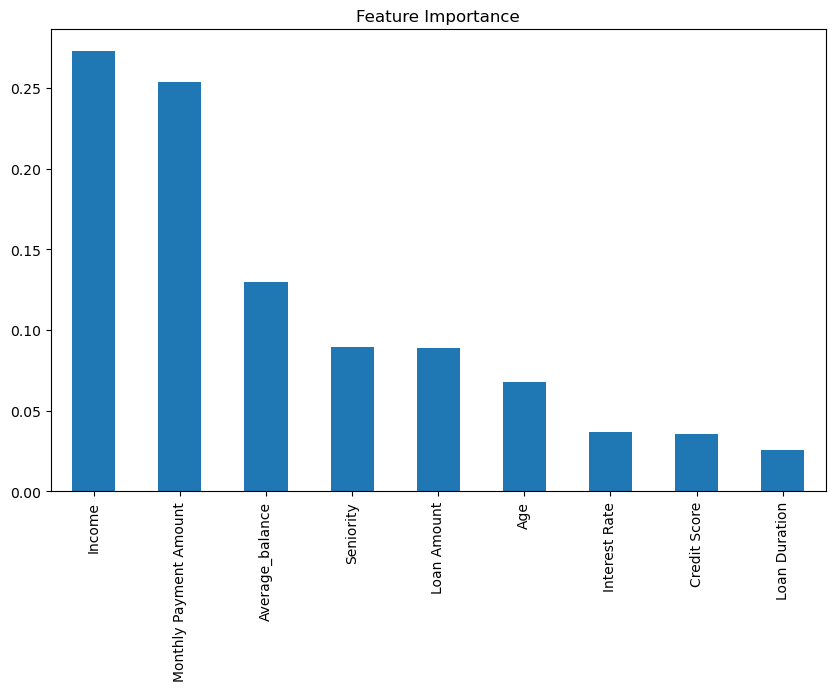

In [237]:
# Plot feature importance
plt.figure(figsize=(10, 6))                # Set the plot size
feat_importance.plot(kind='bar')           # Plot as a bar chart
plt.title('Feature Importance')            # Add a title
plt.show()                                 # Display the plot

# This plot helps identify which features most strongly influenced the model's predictions.

Top Feature Model Evaluation:
Confusion Matrix:
 [[17  1]
 [ 1 19]]

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        20

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



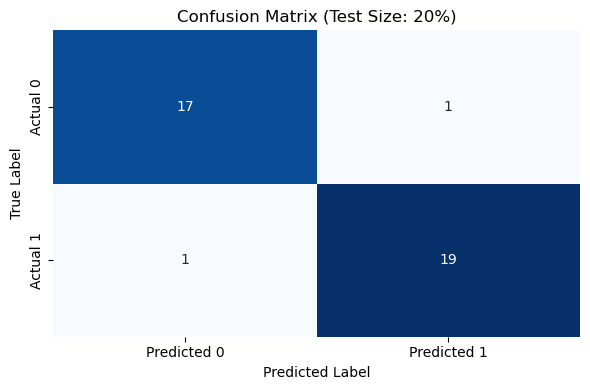

In [239]:
# Your function
def plot_confusion_matrix_with_test_size(X, y, test_size_percent):
    # Import required libraries for model training, evaluation, and plotting
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Convert test size from percentage to decimal
    test_size = test_size_percent / 100.0

    # Split the dataset into training and test sets (stratify ensures class balance in split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute the confusion matrix and other evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print evaluation results
    print("Top Feature Model Evaluation:")
    print("Confusion Matrix:\n", cm)
    print("\nAccuracy: {:.2f}".format(acc))
    print("\nClassification Report:\n", report)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Label')  # x-axis label
    plt.ylabel('True Label')       # y-axis label
    plt.title(f'Confusion Matrix (Test Size: {test_size_percent}%)')  # title with dynamic test size
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()  # Display the plot


# CALL THE FUNCTION TO TRIGGER OUTPUT
plot_confusion_matrix_with_test_size(X, y, 20)